In [25]:
import matplotlib.pyplot as plt
import torch
import seaborn as sns
import networkx as nx
import pandas 
import json, os
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
%matplotlib inline
sns.set()

In [2]:
def parse_graph(inpath, outpath, save = True):
    df = pandas.DataFrame(columns=['id1', 'id2'])
    with open(inpath, 'r') as f:
        line = f.readline()
        cnt = 1
        while line:
            df.loc[cnt] = line.strip().split("\t")
            line = f.readline()
            cnt += 1
    df['weight'] = 1
    if save:
        df.to_csv(os.path.join(outpath, 'data.csv'), index=False)
        train, test = train_test_split(df, train_size = 0.8)
        train.to_csv(os.path.join(outpath, 'train.csv'), index=False)
        test.to_csv(os.path.join(outpath, 'test.csv'), index=False)
    return df
    

In [7]:
df = parse_graph('resources/physics/CA-GrQc.txt', 
                 'resources/physics/')

In [9]:
len(df['id1'].unique())

5242

In [18]:
outpath = 'resources/physics/'
train, test = train_test_split(df, train_size = 0.8)
train.to_csv(os.path.join(outpath, 'train5.csv'), index=False)
test.to_csv(os.path.join(outpath, 'test5.csv'), index=False)

In [ ]:
python3 embed.py \
       -dim 2 \
       -lr 0.3 \
       -epochs 100 \
       -negs 10 \
       -burnin 20 \
       -ndproc 4 \
       -manifold poincare \
       -dset resources/physics/train.csv \
       -checkpoint results/physics/result.pth \
       -batchsize 10 \
       -eval_each 1 \
       -sparse \
       -train_threads 2
       -sym

python3 embed.py \
       -dim 2 \
       -lr 0.3 \
       -epochs 200 \
       -negs 50 \
       -burnin 20 \
       -ndproc 4 \
       -manifold euclidean \
       -dset resources/physics/train.csv \
       -checkpoint results/physics/result_eu.pth \
       -batchsize 10 \
       -eval_each 1 \
       -sparse \
       -train_threads 2
       -sym

In [ ]:
python3 link_pred.py \
       -dim 10 \
       -lr 0.3 \
       -epochs 100 \
       -negs 10 \
       -burnin 20 \
       -ndproc 4 \
       -manifold poincare \
       -dset resources/physics/data.csv \
       -batchsize 10 \
       -eval_each 20 \
       -sparse \
       -train_threads 2 \
       -sym

python3 link_pred.py \
       -dim 10 \
       -lr 0.3 \
       -epochs 100 \
       -negs 50 \
       -burnin 20 \
       -ndproc 4 \
       -manifold euclidean \
       -dset resources/physics/data.csv \
       -batchsize 10 \
       -eval_each 20 \
       -sparse \
       -train_threads 2 \
       -sym

In [40]:
from hype.euclidean import EuclideanManifold
from hype.poincare import PoincareManifold
from sklearn.metrics import average_precision_score

def link_prob(d, r, t):
    return 1/np.exp((d-r)/t)+1 #eq. 7 in paper
              
def link_pred_map(obj, embedding, distfn, r=1, t=1):
    ap_list = []
    for i, node in tqdm(enumerate(obj)):
        dists = distfn(embedding[None, i], embedding).numpy()
        dists[i] = 1e12
        probs = [link_prob(d, r, t) for d in dists]
        y_true = get_y_true(obj, node, df)
        ap = average_precision_score(y_true, probs)
        print(ap)
        ap_list.append(ap) #calculates average percision score
    return np.mean(ap_list)
                
def get_y_true(obj, v, df): 
    y_pred = []
    v_edge_to = df[df['id1'] == str(v)]['id2']
    y_true = [1 if n in v_edge_to else 0 for n in obj]
    return y_true
    

In [17]:
chkpnt = torch.load('results/physics_first/result.pth.199', map_location='cpu')

embedding = chkpnt['embeddings']
obj = chkpnt['objects']

df = pandas.read_csv('resources/physics/data.csv')

In [26]:
from hype.poincare import PoincareManifold


In [41]:
link_pred_map(obj, embedding, PoincareManifold().distance)

0it [00:00, ?it/s]/Users/sophiasun/miniconda2/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  
8it [00:00, 38.75it/s]

[1.0, 2.165280745073411, 1.0052326635237185, 1.0020959775292297, 1.0268101208889564, 1.0021348752759787, 1.0005450972151373, 1.0053796807450681, 1.01167031413798, 1.0057592018289396, 1.001673896794828, 1.0017216217119256, 1.0003426690604016, 1.0003115507773717, 1.0007346525347964, 1.001528997342439, 1.00139031107999, 1.0002913845110524, 1.0003198886174574, 1.0002184066023159, 1.3063736549135916, 1.3116064353351407, 1.0058946847795678, 1.0056881893928504, 1.0138274524462147, 1.013463975131304, 1.000430420230042, 1.0018119679270512, 1.0003784235981987, 1.0003790591336472, 1.000382900645691, 1.0003690108641443, 1.047920569823428, 1.020066135604203, 1.0003685026955114, 1.000362708276737, 1.0101141903246298, 1.0588070175396074, 1.003922117040388, 1.0452810492599196, 1.001656581818169, 1.00038649355522, 1.0003353376741702, 1.0003568240918406, 1.0357181281847603, 1.0023851214862967, 1.003977543815192, 1.0074053253684818, 1.0251601300890065, 1.0121212538471647, 1.0003613391366706, 1.0010137501

16it [00:00, 38.58it/s]

[1.0057592018289396, 1.00690871132616, 1.0021312058938912, 1.0008346422628818, 1.0117396297460421, 1.0012788916087267, 1.0032617128154577, 1.0317258316981106, 1.0012194714848128, 1.0, 1.0001334452348367, 1.0001372605716874, 1.0000319730845943, 1.0000290620592764, 1.0009684559726442, 1.0019706663539318, 1.0001296745621493, 1.0000271810254586, 1.0001486969743203, 1.0001015701124523, 1.0454647704236122, 1.0012355871194398, 1.167205895657811, 1.1633611278842295, 1.0076907733210043, 1.0022330692568915, 1.0009515201360535, 1.003956670685951, 1.0000994896461646, 1.0000996559969615, 1.0001632022113904, 1.000157381939033, 1.0203954214495998, 1.1608988359989905, 1.0000343739803184, 1.0000338348800917, 1.0021737374736548, 1.0152818817912124, 1.5721504727623574, 1.3450241477475724, 1.000686481884517, 1.0001607651835092, 1.0019343281635666, 1.002058270154985, 1.2353237778473343, 1.0404519729644692, 1.000186086246843, 1.000341255752232, 1.0057364880427992, 1.089699476734536, 1.0001679951747449, 1.00

24it [00:00, 38.44it/s]

[1.0003198886174574, 1.0003390436044237, 1.0247513214159063, 1.0081621253127135, 1.0318349981522732, 1.0038233168456527, 1.0000269207349957, 1.000265650158946, 1.0002420860477392, 1.0001486969743203, 1.000021346789613, 1.0000219583076817, 1.0000057668897293, 1.0000052407330595, 1.0001144472211696, 1.0002461492646875, 1.0000233813118649, 1.0000049015454244, 1.0, 2.8004797244290223, 1.001498448641572, 1.0000610759302957, 1.0001213725904816, 1.0001172444353805, 1.0262053751809224, 1.0000490370295243, 1.000037744841219, 1.0001604619459137, 1.000089269704114, 1.0000894169561676, 1.004986822745968, 1.0048791237607586, 1.0003022901426273, 1.0003500887227341, 1.0000061985268072, 1.000006101519875, 1.0011593823229719, 1.0078858952364451, 1.0001107054737, 1.0010806503286518, 1.0118973777300866, 1.003033415210294, 1.000005277744592, 1.0000056159170683, 1.0012975697781097, 1.000087719702829, 1.000021845206658, 1.0000397748621732, 1.000111251028962, 1.0005376952736873, 3.3836967483147653, 1.8534584

32it [00:00, 38.54it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

130it [00:03, 37.61it/s]

[1.0314505912199317, 1.0323417341916827, 1.210741397133432, 1.0913054090963394, 1.6991506591041245, 1.0325911511647963, 1.0014176091372822, 1.0139938897546756, 1.0380001824649145, 1.0091908246053185, 1.0030219313396238, 1.0031085759292764, 1.0008636762046461, 1.0007847965999137, 1.0040414557139774, 1.0085730643732467, 1.0035011181985023, 1.0007340047410787, 1.0088191967516766, 1.0060140440416991, 1.126746907551466, 1.00584540559022, 1.007859052702305, 1.0075901126255988, 1.2352616106156453, 1.0040270468601316, 1.0016610285876066, 1.0070379250055863, 1.0268054920326608, 1.0268499152692545, 1.0135379076142879, 1.0130220011844582, 1.0234976220324252, 1.0234156894503146, 1.0009282182983485, 1.0009137066895637, 1.3203802816736911, 2.407509603014468, 1.0067094207169327, 1.0685494080230054, 1.0637539377077072, 1.014715828070338, 1.0003591262119504, 1.00038213723008, 1.0748446283231137, 1.0049938458060135, 1.0027171498876517, 1.0049336678908452, 1.0089717218303536, 1.0292031035509948, 1.009956

138it [00:03, 37.39it/s]

[1.0092634459820877, 1.0113470830785776, 1.0025709684980122, 1.0010098516811312, 1.014054678392162, 1.0014576800544486, 1.0020579760433663, 1.0201766460833392, 1.0016891226294864, 1.1399955158868342, 1.000188329446129, 1.0001937130094056, 1.000044645898618, 1.0000405817958586, 1.0009516236281708, 1.0019460248694956, 1.0001810772133934, 1.0000379551388776, 1.0001760990265127, 1.0001202797505555, 1.0772170368640102, 1.0020291482796644, 1.8642750343564232, 1.8312322650055242, 1.0088761936307302, 1.0044118366899693, 1.0008247477457692, 1.0034410663408349, 1.000126648679975, 1.000126860546301, 1.0001956448783642, 1.0001886510878144, 1.0455155455032523, 2.022062515912176, 1.0000479993432725, 1.0000472464139514, 1.0028276667196718, 1.0195904306812815, 1.0630308092023164, 1.3965759831895892, 1.0008261314552847, 1.0001933686370394, 1.0154628979711136, 1.0164535042288665, 1.168340089139321, 1.0162378258714353, 1.0002708503918207, 1.0004970867204515, 1.0117593584599718, 1.0530198560064457, 1.0001

146it [00:03, 37.52it/s]

[1.000896056709587, 1.0009151184133016, 1.0064254801412578, 1.0028948607115495, 1.0184828511453843, 1.0008400152320915, 1.0000370442581799, 1.000365687367047, 1.0012931267302692, 1.0002434377444585, 1.0000973887556996, 1.0001001822289701, 1.0000286321095175, 1.0000260157270973, 1.0001036439860507, 1.0002197770644556, 1.0001160567958705, 1.0000243320179816, 1.0002421019049965, 1.0001650581071129, 1.0034977245646928, 1.0001655327893855, 1.0002091635540546, 1.0002020012499009, 1.006088384452049, 1.0001106972161606, 1.0000429461643696, 1.0001819372801741, 1.0546763438606064, 1.0547432748159165, 1.0003952208880509, 1.0003799315000859, 1.00064023607976, 1.0006254245066715, 1.0000307699749125, 1.0000302891871273, 1.0248664261569669, 1.0413845507297146, 1.0001773758731398, 1.0018199344888008, 1.001916091012479, 1.0004406545291544, 1.0000096117074684, 1.000010227577582, 1.0019692346623792, 1.0001312870092085, 1.0000829724808182, 1.0001505059661309, 1.000245877245548, 1.0007648284581443, 1.00027

154it [00:04, 37.22it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

250it [00:06, 37.62it/s]

[1.0093433092283068, 1.0090954177459663, 1.0093156336006355, 1.0038842611491432, 1.0397532819915252, 1.0022966913152425, 1.0001986461737018, 1.0019611432761488, 1.053278334276689, 1.0014783120678847, 1.0025035344936162, 1.0025755819646118, 1.0009345408364743, 1.0008487391929435, 1.0004386877247193, 1.0009239265157797, 1.0037849397516854, 1.0007938165004726, 1.0004678093566088, 1.0003192011473714, 1.0288552476038082, 1.0016560277155968, 1.001322691194924, 1.0012771576788309, 1.01587751918738, 1.0008971223648055, 1.0002048405253796, 1.0008660293409275, 1.0018855865518708, 1.0018888004231323, 1.000635958056104, 1.000612287162169, 1.0048616199650346, 1.0040717582222023, 1.001003803950431, 1.0009881953018605, 1.1163005119249532, 1.1596077935607587, 1.0010595826557915, 1.0112519480272015, 1.0028754340900239, 1.000667022654542, 1.0000636299915555, 1.0000677070715114, 1.0112471046715075, 1.0007459536175842, 1.0014110187035088, 1.0025407400675408, 1.0019493683507426, 1.004190989169154, 1.000528

258it [00:06, 37.96it/s]

[1.000933618970515, 1.0010347264335693, 1.0020855933958892, 1.0007923019862175, 1.0118727239869367, 1.002645595401137, 1.0003212757871673, 1.0031592381896608, 1.0004017231924294, 1.0010759496278385, 1.0000395220224527, 1.0000406531170531, 1.0000100526941167, 1.0000091364912205, 1.031587286932349, 1.08895164648497, 1.0000407646126552, 1.0000085451490912, 1.000180170952213, 1.0001231670627915, 1.005409699867393, 1.0001856863231262, 1.0007792337960473, 1.0007531461351942, 1.012673152223196, 1.0001914405070003, 1.0010348532439648, 1.0044808777909904, 1.0000588018706438, 1.0000588997912792, 1.0001714790098877, 1.0001655268960914, 1.0013043164826905, 1.002074476731041, 1.0000108063608493, 1.0000106370575088, 1.0010837298305841, 1.0081273305123337, 1.0008452553942873, 1.0071487192194009, 1.0006908172247948, 1.000162738384814, 1.0000301113909482, 1.000032040793812, 1.010994225888315, 1.0008048035573467, 1.000046850835694, 1.0000855835567903, 1.0004487113639762, 1.0057061843990969, 1.0002036171

266it [00:07, 38.17it/s]

[1.000577278672327, 1.000649629547745, 1.0007829894994524, 1.00030073268253, 1.0044515897731385, 1.0007268520595187, 1.0004635279255925, 1.0045252221099665, 1.0002118024730056, 1.0010241803931015, 1.0000214010539497, 1.000022013389463, 1.0000053631036656, 1.0000048744369605, 1.0050543189788734, 1.0089367660003596, 1.000021748767496, 1.0000045589462476, 1.0000622813997517, 1.0000425627939449, 1.0035822874535691, 1.0001164620260883, 1.0006881340270335, 1.000665324351965, 1.003886912923604, 1.0001319932759272, 1.0069820499200568, 1.031518390021322, 1.0000262412268666, 1.000026284981585, 1.0000626558190282, 1.0000604582767048, 1.0009381142633165, 1.001746758780222, 1.000005765345589, 1.0000056749961108, 1.0005096030595133, 1.0037818618343568, 1.0008344080795093, 1.0063305247446896, 1.0002565766333744, 1.0000603065906046, 1.000024860610895, 1.0000264535707981, 1.0112652095463903, 1.0009115335498038, 1.0000263724599943, 1.0000482187091722, 1.0003135945988157, 1.0072531043861699, 1.0000703776

274it [00:07, 37.62it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[1.0043993245781497, 1.004707330196701, 1.0812749725351423, 1.02861828867833, 1.3048657896478386, 1.3212223671474703, 1.000465104311657, 1.004588506601559, 1.0029067215081533, 1.0024053915864515, 1.000263757689754, 1.0002713116592294, 1.000070149406116, 1.0000637509433494, 1.0024022112859974, 1.0052060599579966, 1.0002844269240267, 1.0000596248637963, 1.016864678510031, 1.0115780418968123, 1.0215830017371776, 1.0008472060338076, 1.0019283350098027, 1.0018629036754714, 1.8460392666573857, 1.0007152082078519, 1.0007074380671495, 1.0030122086860167, 1.0007994538708076, 1.0008007772524032, 1.0086675554339666, 1.008396975817216, 1.0044925331838692, 1.0054934713664987, 1.000075402197509, 1.0000742218165575, 1.0117406652910135, 1.0848677597732168, 1.001804784250339, 1.017282969284494, 1.0299799621990722, 1.00721926880014, 1.0000822964399425, 1.000087569604666, 1.0215383827577589, 1.0014666503027083, 1.0002799980569856, 1.0005102135816935, 1.0016326613305526, 1.0091652102950084, 1.019088248338

KeyboardInterrupt: 

In [2]:
from hype.graph import load_adjacency_matrix, load_edge_list, eval_reconstruction


In [123]:
def read_gml(inpath, outpath, attribute_name='value'):

    G = nx.read_gml(inpath)
    G = G.to_undirected()
    # get labels
    label_dic = nx.get_node_attributes(G, attribute_name)

    df = pandas.DataFrame(G.edges(), columns=['id1', 'id2'])
    df['weight'] = 1

    df.to_csv(os.path.join(outpath, 'data.csv'), index=False)
    with open(os.path.join(outpath, 'labels.json'), 'w') as f:
        json.dump(label_dic, f)

    return df, label_dic


In [78]:
read_gml("resources/polblogs/polblogs.gml", "resources/polblogs")

In [69]:
python3 embed.py \
       -dim 2 \
       -lr 0.3 \
       -epochs 200 \
       -negs 10 \
       -burnin 20 \
       -ndproc 4 \
       -manifold poincare \
       -dset resources/polbooks/data.csv \
       -checkpoint results/polbooks/result.pth \
       -batchsize 10 \
       -eval_each 1 \
       -sparse \
       -train_threads 2

python3 embed.py \
       -dim 2 \
       -lr 0.3 \
       -epochs 200 \
       -negs 50 \
       -burnin 20 \
       -ndproc 4 \
       -manifold euclidean \
       -dset resources/polbooks/data.csv \
       -checkpoint results/polbooks/result_eu.pth \
       -batchsize 10 \
       -eval_each 1 \
       -sparse \
       -train_threads 2

SyntaxError: invalid syntax (<ipython-input-69-6ea573ec5ff0>, line 1)

In [206]:
with open(os.path.join('resources/polblogs/labels.json'), 'r') as f:
    labels_dic = json.load(f)
data = pandas.read_csv("resources/polblogs/data.csv")

"\nindex = {obj[i]:i for i in range(len(obj))}\nct = 0\nfor i, edge in data.iterrows():\n    n1 = edge['id1']\n    c1 = lt_np[index[n1]]\n    n2 = edge['id2']\n    c2 = lt_np[index[n2]]\n    if np.linalg.norm(c1-c2)>1:\n        ct += 1\n        plt.plot([c1[0],c2[0]], [c1[1],c2[1]], 'k-', linewidth=0.5, alpha=0.2)\nprint(ct)\n\nmiddle = df[df.apply(lambda x: x['x']**2+ x['y']**2 <0.4, axis=1)]\nfor i, point in middle.iterrows():\n    ax.text(point['x']+.02, point['y'], str(point['name']))\n"

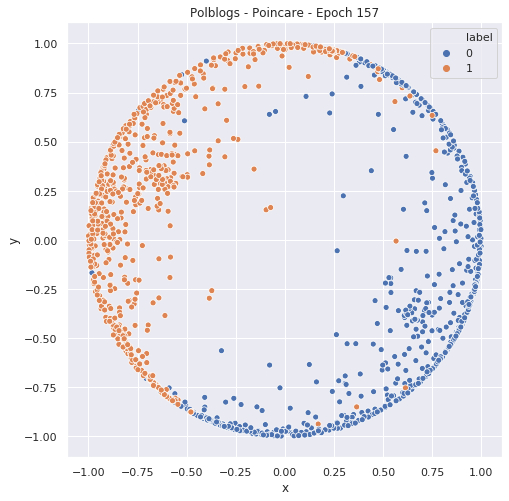

In [207]:
chkpnt = torch.load('results/polblogs/result.pth', map_location='cpu')

lt = chkpnt['embeddings']
obj = chkpnt['objects']
epk = chkpnt['epoch']
labels = [labels_dic[o] for o in obj]
lt_np = lt.numpy()
df = pandas.DataFrame(lt_np, columns=['x', 'y'])
df['label'] = labels
df['name'] = obj

fig = plt.figure(figsize=(8, 8))
ax = sns.scatterplot(x="x", y="y", hue="label", data=df)
ax.set_aspect('equal')
ax.set_title('Polblogs - Poincare - Epoch %s'%epk)

'''
index = {obj[i]:i for i in range(len(obj))}
ct = 0
for i, edge in data.iterrows():
    n1 = edge['id1']
    c1 = lt_np[index[n1]]
    n2 = edge['id2']
    c2 = lt_np[index[n2]]
    if np.linalg.norm(c1-c2)>1:
        ct += 1
        plt.plot([c1[0],c2[0]], [c1[1],c2[1]], 'k-', linewidth=0.5, alpha=0.2)
print(ct)

middle = df[df.apply(lambda x: x['x']**2+ x['y']**2 <0.4, axis=1)]
for i, point in middle.iterrows():
    ax.text(point['x']+.02, point['y'], str(point['name']))
'''

In [ ]:
chkpnt = torch.load('results/polblogs/result.pth', map_location='cpu')

lt = chkpnt['embeddings']
obj = chkpnt["objects"]
epk = chkpnt['epoch']
labels = [labels_dic[o] for o in obj]
lt_numpy = lt.numpy()
df = pandas.DataFrame(lt_numpy, columns=['x', 'y'])
df['label'] = labels
df['name'] = obj

fig = plt.figure(figsize=(8, 8))
ax = sns.scatterplot(x="x", y="y", hue="label", data=df)
ax.set_aspect('equal')
ax.set_title('Polblogs - Poincare - Epoch %s'%epk)

In [131]:
data.shape

(16783, 3)

"\nmiddle = df[df.apply(lambda x: x['x']**2+ x['y']**2 <0.4, axis=1)]\nfor i, point in middle.iterrows():\n    ax.text(point['x']+.02, point['y'], str(point['name']))\n"

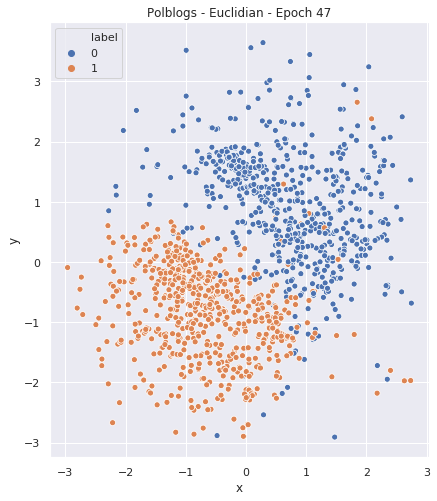

In [120]:
chkpnt = torch.load('results/polblogs/result_eu.pth', map_location='cpu')

lt = chkpnt['embeddings']
obj = chkpnt["objects"]
epk = chkpnt['epoch']
labels = [labels_dic[o] for o in obj]
lt_numpy = lt.numpy()
df = pandas.DataFrame(lt_numpy, columns=['x', 'y'])
df['label'] = labels
df['name'] = obj

fig = plt.figure(figsize=(8, 8))
ax = sns.scatterplot(x="x", y="y", hue="label", data=df)
ax.set_aspect('equal')
ax.set_title('Polblogs - Euclidian - Epoch %s'%epk)


In [124]:
data, labels_dic = read_gml("resources/polbooks/polbooks.gml", "resources/polbooks")

In [ ]:
def exp():
    

0


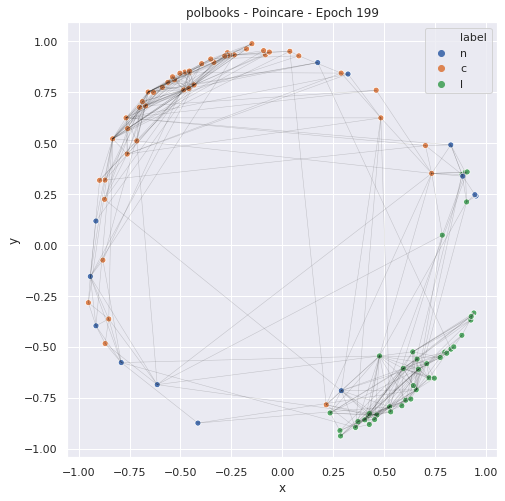

In [152]:
data, labels_dic = read_gml("resources/polbooks/polbooks.gml", 
                                "resources/polbooks")
    
    
chkpnt = torch.load('results/polbooks/result.pth', map_location='cpu')

lt = chkpnt['embeddings']
obj = chkpnt["objects"]
epk = chkpnt['epoch']
labels = [labels_dic[o] for o in obj]
lt_np = lt.numpy()
df = pandas.DataFrame(lt_np, columns=['x', 'y'])
df['label'] = labels
df['name'] = obj

fig = plt.figure(figsize=(8, 8))
ax = sns.scatterplot(x="x", y="y", hue="label", data=df)
ax.set_aspect('equal')
ax.set_title('polbooks - Poincare - Epoch %s'%epk)

index = {obj[i]:i for i in range(len(obj))}
ct = 0
for i, edge in data.iterrows():
    n1 = edge['id1']
    c1 = lt_np[index[n1]]
    n2 = edge['id2']
    c2 = lt_np[index[n2]]
    #if np.linalg.norm(c1-c2)>0.1:
    #    ct += 1
    plt.plot([c1[0],c2[0]], [c1[1],c2[1]], 'k-', linewidth=0.5, alpha=0.2)
print(ct)


Text(0.5, 1.0, 'polbooks - Poincare - Epoch 199')

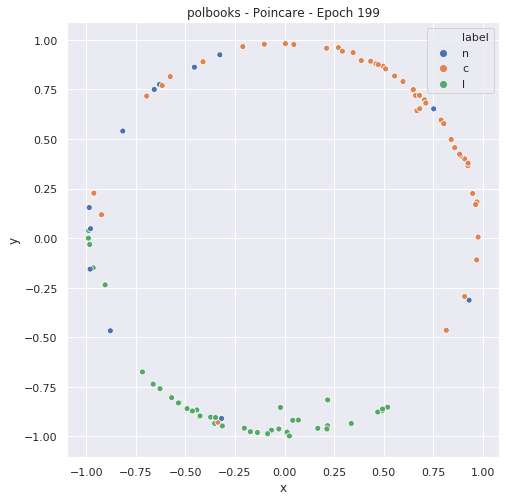

In [125]:
chkpnt = torch.load('results/polbooks/result.pth', map_location='cpu')

lt = chkpnt['embeddings']
obj = chkpnt["objects"]
epk = chkpnt['epoch']
labels = [labels_dic[o] for o in obj]
lt_numpy = lt.numpy()
df = pandas.DataFrame(lt_numpy, columns=['x', 'y'])
df['label'] = labels
df['name'] = obj

fig = plt.figure(figsize=(8, 8))
ax = sns.scatterplot(x="x", y="y", hue="label", data=df)
ax.set_aspect('equal')
ax.set_title('polbooks - Poincare - Epoch %s'%epk)


0


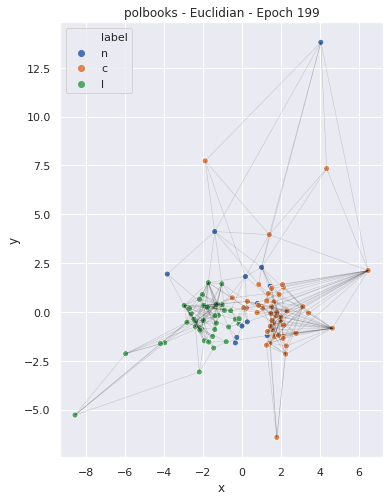

In [154]:
chkpnt = torch.load('results/polbooks/result_eu.pth', map_location='cpu')

lt = chkpnt['embeddings']
obj = chkpnt["objects"]
epk = chkpnt['epoch']
labels = [labels_dic[o] for o in obj]
lt_np= lt.numpy()
df = pandas.DataFrame(lt_np, columns=['x', 'y'])
df['label'] = labels
df['name'] = obj

fig = plt.figure(figsize=(8, 8))
ax = sns.scatterplot(x="x", y="y", hue="label", data=df)
ax.set_aspect('equal')
ax.set_title('polbooks - Euclidian - Epoch %s'%epk)
'''
middle = df[df.apply(lambda x: x['x']**2+ x['y']**2 <0.4, axis=1)]
for i, point in middle.iterrows():
    ax.text(point['x']+.02, point['y'], str(point['name']))
'''

index = {obj[i]:i for i in range(len(obj))}
ct = 0
for i, edge in data.iterrows():
    n1 = edge['id1']
    c1 = lt_np[index[n1]]
    n2 = edge['id2']
    c2 = lt_np[index[n2]]
    #if np.linalg.norm(c1-c2)>0.1:
    #    ct += 1
    plt.plot([c1[0],c2[0]], [c1[1],c2[1]], 'k-', linewidth=0.5, alpha=0.2)
print(ct)


In [ ]:
labels = ["Case_Based", "Genetic_Algorithms", "Neural_Networks", 
    "Probabilistic_Methods", "Reinforcement_Learning",
    "Rule_Learning","Theory"]

In [199]:
def read_cora():
    links = []
    with open("resources/cora/cora.cites",'r') as f:
        line = f.readline()
        cnt = 1
        while line:
            links.append((line.strip().split("\t")))
            line = f.readline()
            cnt += 1
    print(cnt)
    df = pandas.DataFrame(links, columns=['id1', 'id2'])
    rev = df.copy().rename(columns={'id1' : 'id2', 'id2' : 'id1'})
    df = pandas.concat([df, rev])
    df['weight'] = 1
    df.to_csv(os.path.join("resources/cora", 'data.csv'), index=False)
    
    label_dic = {}

    with open("resources/cora/cora.content",'r') as f:
        line = f.readline()
        while line:
            info = line.strip().split("\t")
            label_dic[info[0]] = info[-1]
            line = f.readline()


    with open(os.path.join("resources/cora", 'labels.json'), 'w') as f:
        json.dump(label_dic, f)

    return df, label_dic

In [212]:
cora_df, cora_label = read_cora()

5430


/home/ss/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  del sys.path[0]


In [ ]:
python3 embed.py \
       -dim 2 \
       -lr 0.3 \
       -epochs 200 \
       -negs 50 \
       -burnin 20 \
       -ndproc 4 \
       -manifold poincare \
       -dset resources/cora/data.csv \
       -checkpoint results/cora/result.pth \
       -batchsize 10 \
       -eval_each 1 \
       -sparse \
       -train_threads 2

python3 embed.py \
       -dim 2 \
       -lr 0.3 \
       -epochs 200 \
       -negs 50 \
       -burnin 20 \
       -ndproc 4 \
       -manifold euclidean \
       -dset resources/cora/data.csv \
       -checkpoint results/cora/result_eu.pth \
       -batchsize 10 \
       -eval_each 1 \
       -sparse \
       -train_threads 2

In [192]:
list(set(labels))

[0, 1, 2, 3, 4, 5, 6]

In [197]:
df.label.unique()

array([1, 2, 6, 4, 0, 3, 5])

In [216]:
len(obj)

2708

Text(0.5, 1.0, 'Cora - Poincare - Epoch 198')

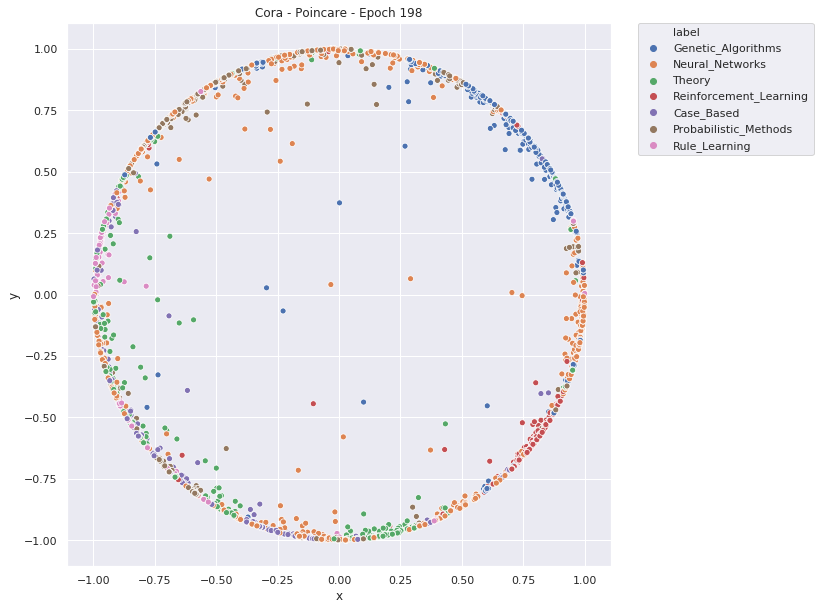

In [215]:
chkpnt = torch.load('results/cora/result.pth', map_location='cpu')

lt = chkpnt['embeddings']
obj = chkpnt["objects"]
epk = chkpnt['epoch']
labels = [cora_label[str(o)] for o in obj]
lt_numpy = lt.numpy()
df = pandas.DataFrame(lt_numpy, columns=['x', 'y'])
df['label'] = labels
df['name'] = obj

fig = plt.figure(figsize=(10, 10))
ax = sns.scatterplot(x="x", y="y", hue="label", data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_aspect('equal')
ax.set_title('Cora - Poincare - Epoch %s'%epk)


KeyError: '100monkeystyping.com'

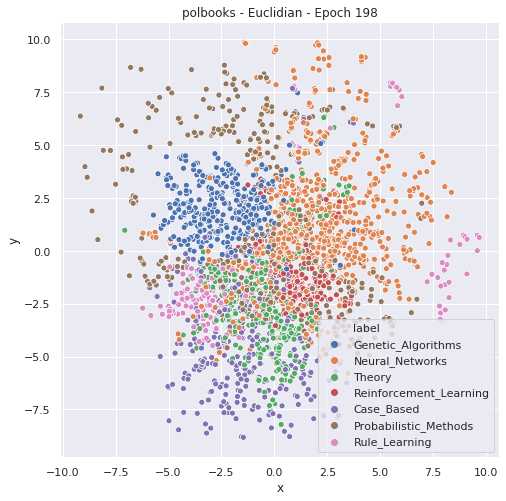

In [214]:
chkpnt = torch.load('results/cora/result_eu.pth', map_location='cpu')

lt = chkpnt['embeddings']
obj = chkpnt["objects"]
epk = chkpnt['epoch']
labels = [cora_label[str(o)] for o in obj]
lt_np= lt.numpy()
df = pandas.DataFrame(lt_np, columns=['x', 'y'])
df['label'] = labels
df['name'] = obj

fig = plt.figure(figsize=(8, 8))
ax = sns.scatterplot(x="x", y="y", hue="label", data=df)
ax.set_aspect('equal')
ax.set_title('polbooks - Euclidian - Epoch %s'%epk)
'''
middle = df[df.apply(lambda x: x['x']**2+ x['y']**2 <0.4, axis=1)]
for i, point in middle.iterrows():
    ax.text(point['x']+.02, point['y'], str(point['name']))
'''

index = {obj[i]:i for i in range(len(obj))}
ct = 0
for i, edge in data.iterrows():
    n1 = edge['id1']
    c1 = lt_np[index[n1]]
    n2 = edge['id2']
    c2 = lt_np[index[n2]]
    #if np.linalg.norm(c1-c2)>0.1:
    #    ct += 1
    plt.plot([c1[0],c2[0]], [c1[1],c2[1]], 'k-', linewidth=0.5, alpha=0.2)
print(ct)


In [3]:
chkpnt = torch.load('results/mammals.pth', map_location='cpu')
lt = chkpnt['embeddings']

In [5]:
lt.shape

torch.Size([1180, 5])

In [7]:
lt_np = lt.numpy()

In [10]:
lt_2d = lt_np[:,:2]

In [11]:
print(lt_2d[0])

[-0.47410328  0.69495815]


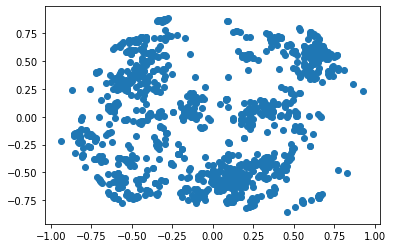

In [14]:
plt.scatter(lt_2d[:,0], lt_2d[:,1])

In [15]:
chkpnt = torch.load('results/2d/mammals.pth', map_location='cpu')
lt = chkpnt['embeddings']

In [43]:
chkpnt.keys()

dict_keys(['conf', 'objects', 'model', 'embeddings', 'epoch', 'manifold'])

In [44]:
chkpnt["objects"]

['rhodesian_man.n.01',
 'primate.n.02',
 'stoat.n.01',
 'placental.n.01',
 'hind.n.02',
 'deer.n.01',
 'fissipedia.n.01',
 'mammal.n.01',
 'virginia_deer.n.01',
 'ruminant.n.01',
 'bottle-nosed_whale.n.01',
 'toothed_whale.n.01',
 'bushbuck.n.01',
 'western_lowland_gorilla.n.01',
 'leopard.n.02',
 'big_cat.n.01',
 'western_big-eared_bat.n.01',
 'carnivorous_bat.n.01',
 'lionet.n.01',
 'feline.n.01',
 'stag.n.02',
 'buck.n.05',
 'fawn.n.02',
 'manx.n.02',
 'domestic_cat.n.01',
 'australopithecus_boisei.n.01',
 'rat_terrier.n.01',
 'northern_flying_squirrel.n.01',
 'rodent.n.01',
 'irish_wolfhound.n.01',
 'hunting_dog.n.01',
 'eared_seal.n.01',
 'aquatic_mammal.n.01',
 'giant_eland.n.01',
 'mouse-eared_bat.n.01',
 'woodland_caribou.n.01',
 'galloway.n.02',
 'bovine.n.01',
 'mandrill.n.01',
 'eland.n.01',
 'gopher.n.04',
 'bezoar_goat.n.01',
 'welsh.n.03',
 'sporting_dog.n.01',
 'canine.n.02',
 'old_world_buffalo.n.01',
 'mountain_chinchilla.n.01',
 'wild_dog.n.01',
 'common_raccoon.n.01'

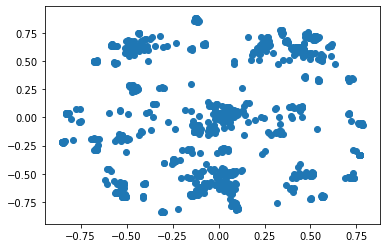

In [16]:
lt_np = lt.numpy()
plt.scatter(lt_np[:,0], lt_np[:,1])

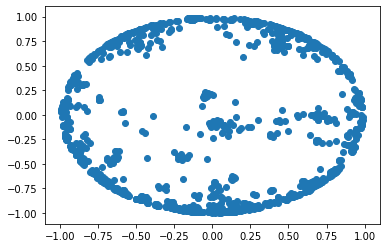

In [29]:
chkpnt = torch.load('results/2d/mammals.pth', map_location='cpu')
lt = chkpnt['embeddings']
lt_np = lt.numpy()
plt.scatter(lt_np[:,0], lt_np[:,1])

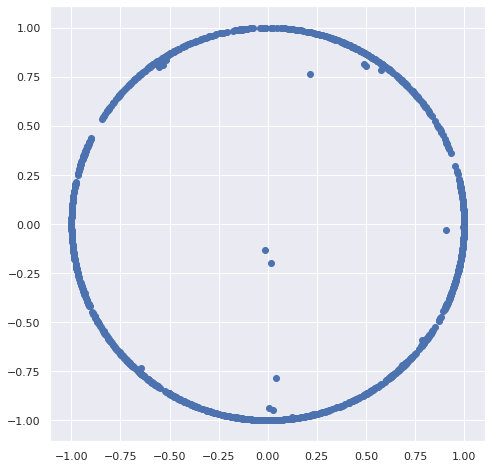

In [39]:
chkpnt = torch.load('results/2d/mammals.pth', map_location='cpu')
lt = chkpnt['embeddings']
lt_np = lt.numpy()

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.scatter(lt_np[:,0], lt_np[:,1])
ax.set_aspect('equal')


In [4]:
meanrank, maprank = eval_reconstruction(adj, lt, manifold.distance)


NameError: name 'adj' is not defined